# Filter Impact Analysis

This notebook visualizes and compares the performance of all 128 filter combinations from `batch_run_filters.py`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load results
results_path = '../results/batch_backtest_results.csv'
df = pd.read_csv(results_path)
df.head()

,Ticker,Entry Date,Exit Date,Buy Price,Sell Price,Return %,Config_ID,USE_CONFIRMATION_CANDLE,USE_RSI_FILTER,USE_MACD_HIST_FILTER,USE_FORCE_INDEX_FILTER,USE_ATR_FILTER,USE_MACD_DIVERGENCE,USE_TRAILING_EXIT
0,AAPL,2008-01-24,2008-01-31,135.60,135.36,-0.176991,CFG_009,False,False,False,True,False,False,False
1,AAPL,2008-01-25,2008-02-01,130.01,133.75,2.876702,CFG_009,False,False,False,True,False,False,False
2,AAPL,2008-01-28,2008-02-04,130.01,131.65,1.261441,CFG_009,False,False,False,True,False,False,False
3,AAPL,2008-01-29,2008-02-05,131.54,129.36,-1.657291,CFG_009,False,False,False,True,False,False,False
4,AAPL,2008-02-07,2008-02-14,121.24,127.46,5.130320,CFG_009,False,False,False,True,False,False,False


In [2]:
# Aggregate results by filter configuration
summary = df.groupby('Config_ID').agg(
    Trades=('Return %', 'count'),
    WinRate=('Return %', lambda x: (x > 0).mean()),
    AvgReturn=('Return %', 'mean')
).reset_index()

summary = summary.sort_values(by='AvgReturn', ascending=False)
summary.head(10)

,Config_ID,Trades,WinRate,AvgReturn
80,CFG_097,186,0.731183,3.400432
84,CFG_101,159,0.729560,3.191628
62,CFG_079,8,0.875000,2.959660
96,CFG_113,228,0.710526,2.957218
104,CFG_121,271,0.697417,2.764896
88,CFG_105,267,0.696629,2.755097
100,CFG_117,196,0.704082,2.732615
58,CFG_075,9,0.888889,2.725686
110,CFG_127,9,0.888889,2.698659
94,CFG_111,9,0.888889,2.698659


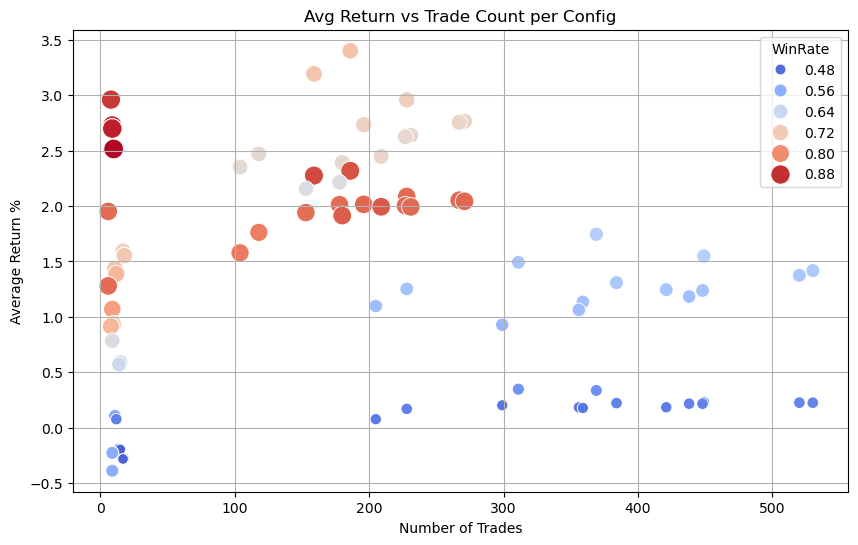

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary, x='Trades', y='AvgReturn', hue='WinRate', palette='coolwarm', size='WinRate', sizes=(50, 200))
plt.title('Avg Return vs Trade Count per Config')
plt.xlabel('Number of Trades')
plt.ylabel('Average Return %')
plt.grid(True)
plt.show()

In [4]:
# Analyze filter impact
filters = [col for col in df.columns if col.startswith('USE_')]
impact = df[filters + ['Return %']].copy()
impact['Win'] = impact['Return %'] > 0

filter_summary = impact.groupby(filters)['Win'].agg(['mean', 'count']).reset_index()
filter_summary = filter_summary.sort_values(by='mean', ascending=False)
filter_summary.head()

,USE_CONFIRMATION_CANDLE,USE_RSI_FILTER,USE_MACD_HIST_FILTER,USE_FORCE_INDEX_FILTER,USE_ATR_FILTER,USE_MACD_DIVERGENCE,USE_TRAILING_EXIT,mean,count
90,True,True,False,True,False,True,False,0.9,10
98,True,True,True,False,False,True,False,0.9,10
66,True,False,True,False,False,True,False,0.9,10
106,True,True,True,True,False,True,False,0.9,10
74,True,False,True,True,False,True,False,0.9,10
